In [1]:
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [2]:
inference_shape = (288, 288)
device = "cuda"

Model is U^2-Net from https://github.com/xuebinqin/U-2-Net/

In [3]:
!wget -q --show-progress --progress=bar:force 2>&1 -P ../assets/ https://github.com/Dawars/DocMAE/releases/download/background_segmentation/u2netp.pth

u2netp.pth          100%[===================>]   5,26M  --.-KB/s    in 0,1s    


In [4]:
model = torch.jit.load("../assets/u2netp.pth", map_location=device)

Images are taken from DIW300 dataset test set: https://github.com/fh2019ustc/DocGeoNet

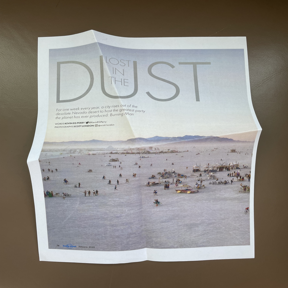

In [5]:
image = Image.open("../assets/18.png")  # 2, 18, 19

image_np = np.array(image.resize(inference_shape))
image.resize(inference_shape)

In [6]:
transforms = T.Compose([T.Resize(size=inference_shape), T.ToTensor(), T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
input_tensor = transforms(image).to(device)
input_tensor.size()

torch.Size([3, 288, 288])

In [7]:
with torch.no_grad():
    mask = model(input_tensor[None])

In [8]:
mask_np = mask.cpu().numpy()[0, ..., np.newaxis]

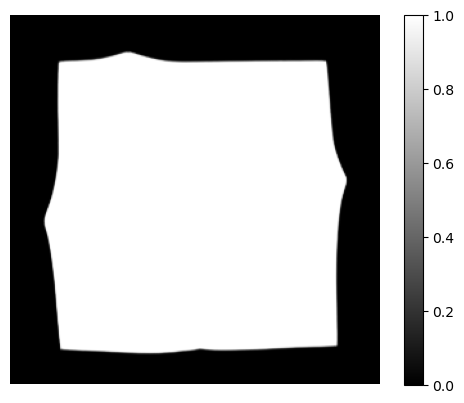

In [9]:
plt.imshow(mask_np, cmap="gray")
plt.axis('off')
plt.colorbar()

In [10]:
bool_mask = mask_np > 0.5

(-0.5, 287.5, 287.5, -0.5)

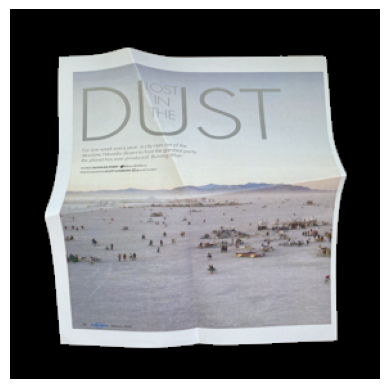

In [11]:
plt.imshow(image_np * bool_mask)
plt.axis('off')